# Aligned residues analysis
*File for analysis of specific aligneg GPCR pair and specific tm*
* use **residues_aligner.p** to obtain data

In [6]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
res_data = pd.read_csv('aligned_residues.csv')

Text(0.5,0,'residue index')

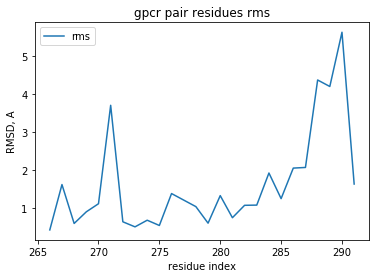

In [7]:
res_data.plot(x = 'resi', y = 'rms')
pylab.title('gpcr pair residues rms')
pylab.ylabel('RMSD, A')
pylab.xlabel('residue index')

## Residue data smoother

In [12]:
def smooth_data(res_data, step):
    sum_rms = []
    for idx in res_data.index:
        if (idx + step - 1) in res_data.index:
            s = sum(res_data['rms'][idx:idx + step]) / float(step)
            sum_rms.append([idx + res_data['resi'][0], s])

    X = [x[0] for x in sum_rms]
    Y = [y[1] for y in sum_rms]
    
    return X, Y

Text(0,0.5,'RMSD, A')

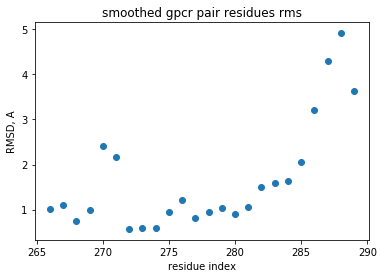

In [13]:
X, Y = smooth_data(res_data, 2)
pylab.scatter(X, Y)
pylab.title('smoothed gpcr pair residues rms')
pylab.xlabel('residue index')
pylab.ylabel('RMSD, A')

## Determine residue index, which corresponds to minimal rmsd

In [14]:
def get_min_resi(X, Y):
    y_min = min(Y)
    
    for x, y in zip(X, Y):
        if y == y_min:
            return x

In [15]:
print min(Y), get_min_resi(X, Y)

0.563048854470253 272.0
